In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path

import random
from load_data import load_data
from test_instances.ts_test import TSTest
from test_instances.fair_sd_ts_test import FairSDTest
from test_instances.sd_ts_test import SDTest
import numpy as np
import pickle


import os
import plot.plot_data_seperated as plt_sep

import matplotlib.pyplot as plt
T=50000
n_iter=100.
end_index = T

folder = 'objects/50000'
def plot_all(test_cases):
    plt_sep.plot_delta_subjective_fair(test_cases)
    plt_sep.plot_subjective_min_e1(test_cases)
    plt_sep.plot_delta_smooth_fair(test_cases)
    plt_sep.plot_min_e1(test_cases)
    plt_sep.plot_average_total_regret(test_cases)
    plt_sep.plot_fairness_regret(test_cases)


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [2]:

def plot_min_e1(test_cases):
    T = test_cases[0].T
    x = range(T)




    for test_ind, test in enumerate(test_cases):
        for e2_ind, e2 in enumerate(test.e2_arr):
            for delta_ind, delta in enumerate(test.delta_arr):
                if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION and not((e2,delta) in LEAVE_OUT)):
                    if test.name == 'Fair SD TS':
                        algo_name = test.get_name(e2=e2, delta=delta)
                        y = test.min_e1[e2_ind, delta_ind]
                        explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                        if explore_end_x < T:
                            plt.plot(x, y, label=algo_name, marker='o', markevery=[int(explore_end_x)])
                        else:
                            plt.plot(x, y, label=algo_name)      
                    else: 
                        algo_name = test.get_label_name(delta=delta, e2=e2)
                        plt.plot(x, test.min_e1[e2_ind, delta_ind],label=algo_name)

    plt.xlabel('$t$')
    plt.ylabel('minimum $\epsilon_1$ for $(\epsilon_1, 2\epsilon_2, \delta)-fairness$')
    name = 'min_e1_{}_'.format(T)+test_cases[0].bandits.data_set_name

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot(name)
    plt.show()


def plot_delta_smooth_fair(test_cases, start_index=0):
    T = test_cases[0].T
    x = range(T)

    for test in test_cases:
        #ds_name = test.bandits.data_set_name
        
       
        for e1_ind, e1 in enumerate(test.e1_arr):
           
            for e2_ind, e2 in enumerate(test.e2_arr):
                
                if test.name == 'Fair SD TS':
                    for delta_ind, delta in enumerate(test.delta_arr):
                        if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION and not((e2,delta) in LEAVE_OUT)):

                            algo_name = test.get_name(e1=e1, e2=e2, delta=delta)
                            y = np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind, delta_ind], axis=1),
                                            axis=1)[start_index:]
                            explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                            if explore_end_x < T:
                                plt.plot(x[start_index:], y, label=algo_name, marker='o', markevery=[int(explore_end_x)])
                            else:
                                plt.plot(x[start_index:], y, label=algo_name)
                else:
                    algo_name = test.get_label_name(e1=e1, e2=e2)
                    plt.plot(x[start_index:],
                             np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                             [start_index:], label=algo_name)

                # xmin = np.amin(np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1))
                # ymin = np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                # plt.plot(xmin, ymin)
                # plt.annotate((1 - d), xy=(2, 1), xytext=(3, 1.5),
                #              arrowprops=dict(facecolor='black', shrink=0.05),
                #          
    plt.xlabel('$t$')
    plt.ylabel('Smooth fair probability \n $(1-\delta)$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    name = 'delta_smooth_fair_{}'.format(T)
    save_plot(name)


    # bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [3]:
def get_tests(folder, data_set):
    ts_test = []
    sd_ts_test = []
    fair_sd_ts_test = []
    for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
        if file.endswith(".file"):
            with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
                test = pickle.load(f) 
                if test.T >= end_index and test.n_iter == n_iter and test.bandits.data_set_name == data_set:
                    if test.name == 'TS':
                        ts_test.append(test)
                    elif test.name == 'SD  TS' or test.name == 'SD TS':
                        sd_ts_test.append(test)

                    elif test.name == 'Fair SD TS':
                        fair_sd_ts_test.append(test)
                        print test.e2_arr

                    else:
                        print 'unknwown test name'
    return ts_test, sd_ts_test, fair_sd_ts_test


[0.01, 0.05, 0.1]


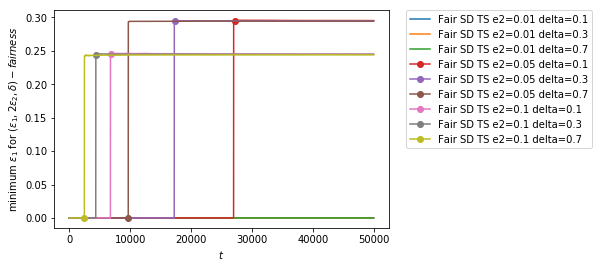

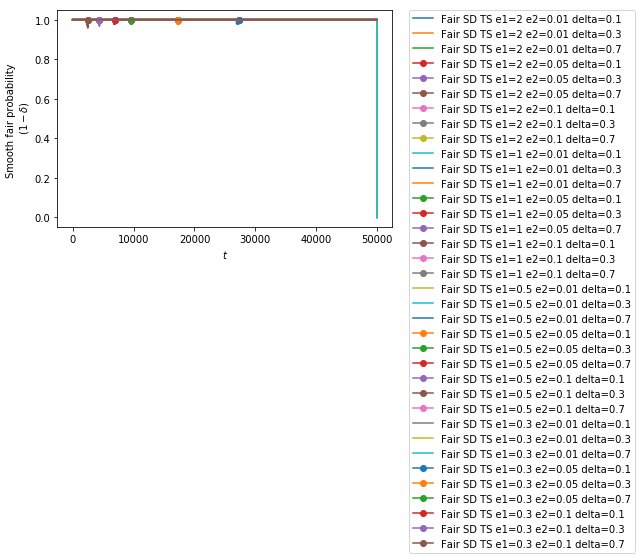

In [12]:
ALL = True
E2_SELECTION = [0.01, 0.05] #0.02
DELTA_SELECTION = [0.3, 0.7, 0.1]
LEAVE_OUT = [] #[(0.05,0.3) ]
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder, 'Data0')
plot_min_e1(fair_sd_ts_test)
plot_delta_smooth_fair(fair_sd_ts_test)


In [18]:
print fair_sd_ts_test[0].c
print fair_sd_ts_test[0].average_rounds_exploring
print fair_sd_ts_test[0].average_n[-1][-1][-1]


[[134807.95230993  85370.39931986  47241.99560244]
 [  5392.3180924    3414.81597279   1889.6798241 ]
 [  1348.0795231     853.7039932     472.41995602]]
[[50000.   50000.   50000.  ]
 [27272.54 17323.33  9640.88]
 [ 6897.27  4392.17  2458.37]]
[  513.94   506.33 16880.79 16122.85 15976.09]


In [14]:
fair_sd_ts_test[0].pi[-1]

array([7.48480888e-04, 2.54367126e-04, 3.44205969e-01, 3.29455665e-01,
       3.25335518e-01])

[0.01, 0.05, 0.1]


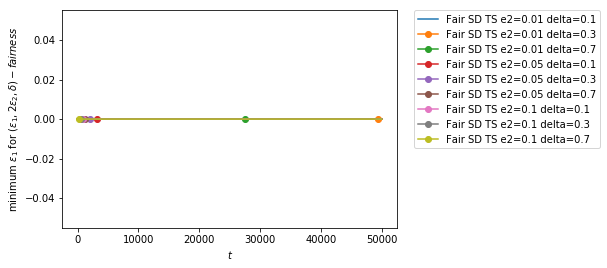

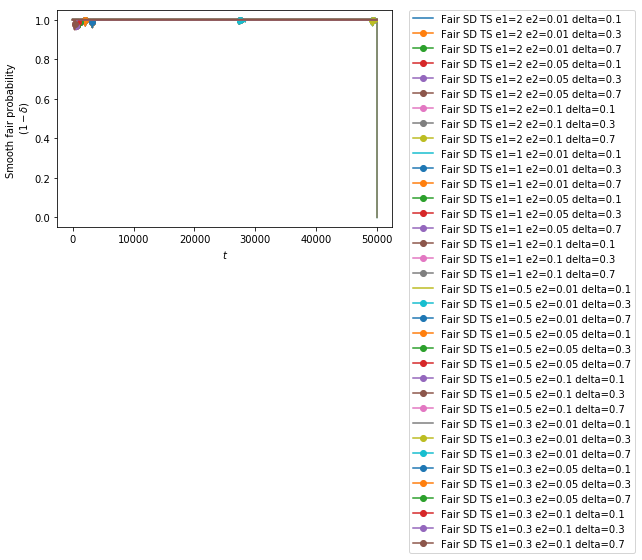

In [6]:
ALL = True
E2_SELECTION = [0.01, 0.05] #0.02
DELTA_SELECTION = [0.3, 0.7, 0.1]
LEAVE_OUT = [] #[(0.05,0.3) ]
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder, 'Data3')
plot_min_e1(fair_sd_ts_test)
plot_delta_smooth_fair(fair_sd_ts_test)


In [7]:
print fair_sd_ts_test[0].c
print fair_sd_ts_test[0].average_rounds_exploring

[[15443.55647723  9780.00600698  5412.02810874]
 [  617.74225909   391.20024028   216.48112435]
 [  154.43556477    97.80006007    54.12028109]]
[[50000.   49330.56 27434.77]
 [ 3219.93  2066.37  1165.05]
 [  839.47   546.57   317.42]]


[0.01, 0.05, 0.1]


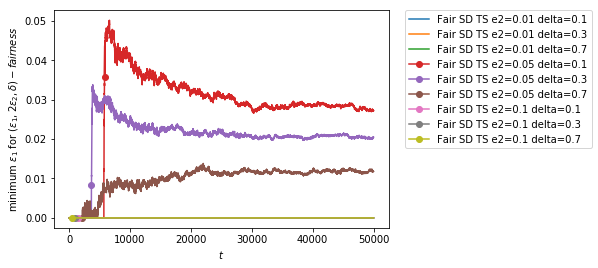

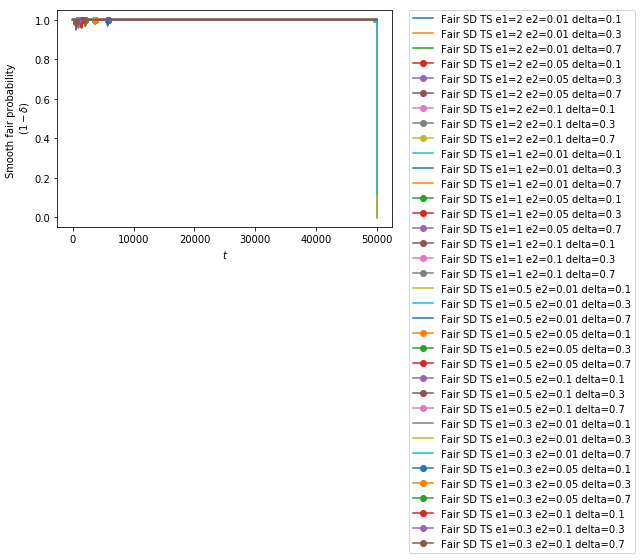

In [19]:
ALL = True
E2_SELECTION = [0.01, 0.05, 0.1] #0.02
DELTA_SELECTION = [0.3, 0.7, 0.1]
LEAVE_OUT = [] #[(0.05,0.3) ]
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder, 'bar_exam')
plot_min_e1(fair_sd_ts_test)
plot_delta_smooth_fair(fair_sd_ts_test)


In [20]:
print fair_sd_ts_test[0].c
print fair_sd_ts_test[0].average_rounds_exploring
print fair_sd_ts_test[0].average_n[-1][-1][-1]


[[28575.35793166 18096.03718129 10013.92655711]
 [ 1143.01431727   723.84148725   400.55706228]
 [  285.75357932   180.96037181   100.13926557]]
[[50000.   50000.   50000.  ]
 [ 5817.47  3670.98  2056.3 ]
 [ 1469.72   937.4    532.79]]
[10433.18  8501.59  9854.16 10064.78 11146.29]


[0.01, 0.05, 0.1]


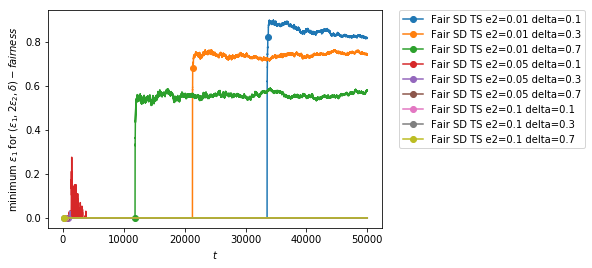

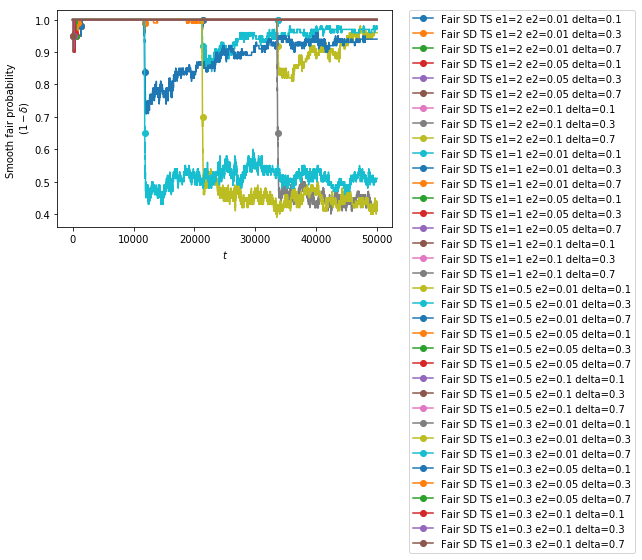

In [10]:
ALL = True
E2_SELECTION = [0.01, 0.05] #0.02
DELTA_SELECTION = [0.3, 0.7, 0.1]
LEAVE_OUT = [] #[(0.05,0.3) ]
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder, 'DataDefault on Credit')
plot_min_e1(fair_sd_ts_test)
plot_delta_smooth_fair(fair_sd_ts_test)


In [11]:
print fair_sd_ts_test[0].c
print fair_sd_ts_test[0].average_rounds_exploring

[[16760.23593293 10613.82514734  5873.44424919]
 [  670.40943732   424.55300589   234.93776997]
 [  167.60235933   106.13825147    58.73444249]]
[[33667.38 21325.86 11838.75]
 [ 1370.62   872.28   488.01]
 [  350.13   224.97   126.91]]
